In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('nifty_it_index.csv',header=None)
data.shape

(249, 7)

In [4]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [5]:
data.columns = data.iloc[0]

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover'], dtype='object', name=0)

In [7]:
data = data.iloc[1:, :]

In [8]:
pd.parse_dates = True
pd.index_col = 'Date'

In [9]:
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
1,01-01-2015,11214.8,11235.75,11166.35,11215.7,4246150,3575100000
2,02-01-2015,11214.65,11399.1,11214.65,11372.1,10004862,9645600000
3,05-01-2015,11369.35,11433.75,11186.95,11248.55,8858018,10590000000
4,06-01-2015,11186.1,11186.1,10909,10959.9,12515739,13645000000
5,07-01-2015,11013.2,11042.35,10889.55,10916,10976356,12034400000


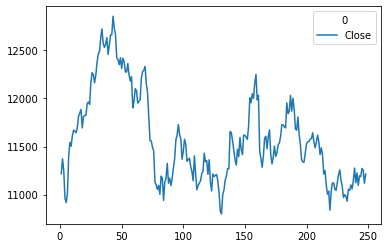

In [10]:

data['Close'] = data['Close'].astype(float)
data.plot()
plt.show()

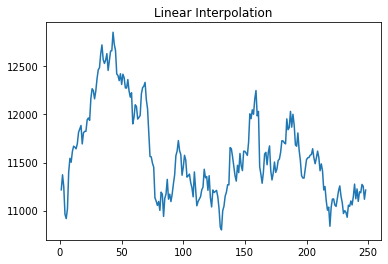

In [11]:

data['Close_linear'] = data['Close'].interpolate(method = 'linear')
data['Close_linear'] = data['Close'].astype(float)
data['Close_linear'].plot()
plt.title('Linear Interpolation')
plt.show()

In [12]:
data['Close_linear']

1      11215.70
2      11372.10
3      11248.55
4      10959.90
5      10916.00
         ...   
244    11184.90
245    11271.80
246    11253.45
247    11117.60
248    11212.55
Name: Close_linear, Length: 248, dtype: float64

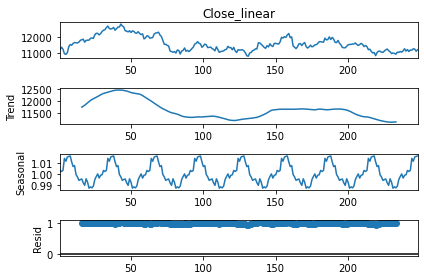

In [13]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data['Close_linear'], model = 'multiplicative', period = 30)
decomposition.plot()
plt.show()

<AxesSubplot:ylabel='Close_linear'>

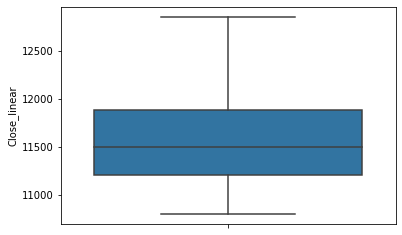

In [14]:
data = data.explode('Close_linear')
data['Close_linear'] = data['Close_linear'].astype(float)
sns.boxplot(y = 'Close_linear', data = data)

In [15]:
train = data.iloc[:210, :]
test = data.iloc[210:, :]

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Close_linear'], trend = 'additive')
model_fit = model.fit(smoothing_level = 0.05, smoothing_slope = 0.1)
model_fit.params

{'smoothing_level': 0.05,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 11274.51853850051,
 'initial_trend': 62.993369637311424,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [17]:
y_holtexponential = test.copy()
y_holtexponential['holt_exp'] = model_fit.forecast(39)

In [18]:
y_holtexponential

,Date,Open,High,Low,Close,Volume,Turnover,Close_linear,holt_exp
211,05-11-2015,11573.1,11573.1,11397.5,11414.45,6980714,7088900000,11414.45,11519.002082
212,06-11-2015,11424.2,11515.65,11422.95,11485.45,6480847,6426400000,11485.45,11508.448877
213,09-11-2015,11364.55,11427.95,11320.95,11412.15,10126396,10092000000,11412.15,11497.895671
214,10-11-2015,11385.7,11387.85,11191.9,11214.20,6966686,7369200000,11214.20,11487.342466
215,11-11-2015,11305.2,11312.3,11230.4,11249.70,795240,827200000,11249.70,11476.789260
216,13-11-2015,11110.75,11176.75,11027.1,11102.45,6927725,8085600000,11102.45,11466.236055
217,16-11-2015,11011.5,11061.6,10911.1,11003.80,8864946,9172700000,11003.80,11455.682849
218,17-11-2015,11032.45,11052.4,10974.55,11035.10,10917373,10768800000,11035.10,11445.129644
219,18-11-2015,10967.75,10969.5,10799,10836.70,10167296,10129200000,10836.70,11434.576438
220,19-11-2015,10910.5,11059.85,10893.75,11032.90,9850813,10086300000,11032.90,11424.023233


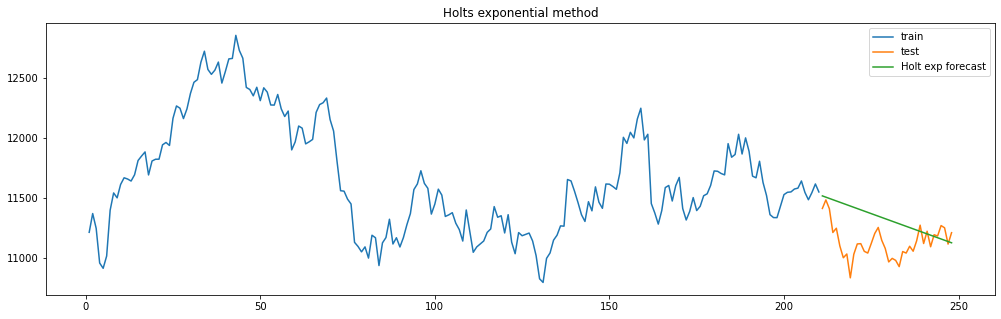

In [19]:
plt.rcParams['figure.figsize'] = (17,5)
plt.plot(train['Close_linear'], label = 'train')
plt.plot(test['Close_linear'], label = 'test')
plt.plot(y_holtexponential['holt_exp'], label = 'Holt exp forecast')
plt.legend()
plt.title('Holts exponential method')
plt.show()

In [20]:
mape = np.round(np.mean(np.abs(test['Close_linear']-y_holtexponential['holt_exp'])/ test['Close_linear'])*100, 2)

In [21]:
mape

1.88

In [22]:
from sklearn.metrics import mean_squared_error
rmse = np.round(np.sqrt(mean_squared_error(test['Close_linear'], y_holtexponential['holt_exp'])),2)
rmse

251.65

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Close_linear'], trend = 'multiplicative', seasonal = 'additive', seasonal_periods =50)
model_fit = model.fit(smoothing_level = 0.19, smoothing_slope = 0.15)
model_fit.params

{'smoothing_level': 0.19,
 'smoothing_trend': 0.15,
 'smoothing_seasonal': 0.004991604100771888,
 'damping_trend': nan,
 'initial_level': 12037.582324511875,
 'initial_trend': 1.0050147902395121,
 'initial_seasons': array([ 157.44886448,  127.47447418,   82.86601699,  187.80772897,
         210.59632407,  177.46632981,  129.60679332,  171.72964761,
         185.74416832,   67.87203155,   72.54839008, -106.31883325,
        -163.19897121, -176.09241563, -104.04404918,   48.95570669,
         144.61799932,   83.14866697,  150.23654337,   73.06201745,
          12.89662321, -172.3598684 , -253.6476203 , -151.94540511,
        -211.92090984,  -59.23793091, -169.40056335, -233.50852319,
        -266.90163525, -280.93638572, -297.98263199, -166.24973825,
        -114.06974355, -128.74227683, -106.8454481 ,  -82.14717849,
         -20.47688424,   63.2685303 ,   21.42667942,    2.00545338,
          32.86109197,   37.89811098,  116.12009699,  196.11746079,
         165.64113265,  188.91603608,

In [24]:
y_holtswinterexponential = test.copy()
y_holtswinterexponential['holt_winter_exp'] = model_fit.forecast(39)

In [25]:
y_holtswinterexponential

,Date,Open,High,Low,Close,Volume,Turnover,Close_linear,holt_winter_exp
211,05-11-2015,11573.1,11573.1,11397.5,11414.45,6980714,7088900000,11414.45,11214.250728
212,06-11-2015,11424.2,11515.65,11422.95,11485.45,6480847,6426400000,11485.45,11152.302868
213,09-11-2015,11364.55,11427.95,11320.95,11412.15,10126396,10092000000,11412.15,11134.448308
214,10-11-2015,11385.7,11387.85,11191.9,11214.20,6966686,7369200000,11214.20,11201.424677
215,11-11-2015,11305.2,11312.3,11230.4,11249.70,795240,827200000,11249.70,11348.530682
216,13-11-2015,11110.75,11176.75,11027.1,11102.45,6927725,8085600000,11102.45,11438.728413
217,16-11-2015,11011.5,11061.6,10911.1,11003.80,8864946,9172700000,11003.80,11371.573872
218,17-11-2015,11032.45,11052.4,10974.55,11035.10,10917373,10768800000,11035.10,11434.034595
219,18-11-2015,10967.75,10969.5,10799,10836.70,10167296,10129200000,10836.70,11352.422493
220,19-11-2015,10910.5,11059.85,10893.75,11032.90,9850813,10086300000,11032.90,11287.598083


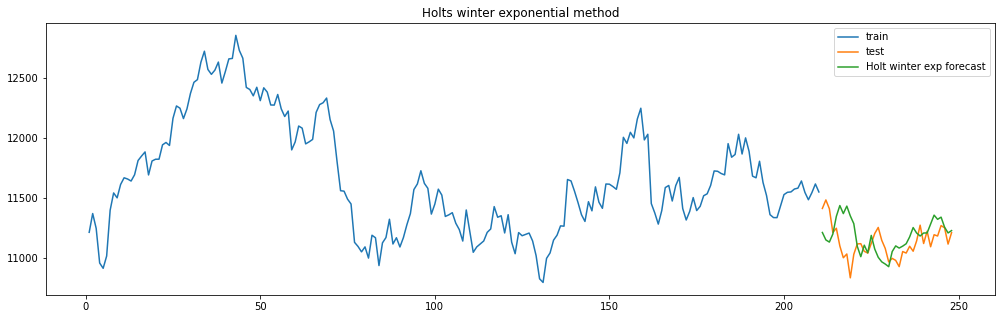

In [26]:
plt.rcParams['figure.figsize'] = (17,5)
plt.plot(train['Close_linear'], label = 'train')
plt.plot(test['Close_linear'], label = 'test')
plt.plot(y_holtswinterexponential['holt_winter_exp'], label = 'Holt winter exp forecast')
plt.legend()
plt.title('Holts winter exponential method')
plt.show()

In [27]:
mape = np.round(np.mean(np.abs(test['Close_linear']-y_holtswinterexponential['holt_winter_exp'])/ test['Close_linear'])*100, 2)
mape

1.29

In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.round(np.sqrt(mean_squared_error(test['Close_linear'], y_holtswinterexponential['holt_winter_exp'])),2)
rmse

187.48

In [29]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close_linear'], autolag = 'AIC')
print(result)

(-2.151814634282925, 0.2241961398533382, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 2888.5507271574334)


In [30]:
from statsmodels.tsa.stattools import kpss
print(result)

(-2.151814634282925, 0.2241961398533382, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 2888.5507271574334)


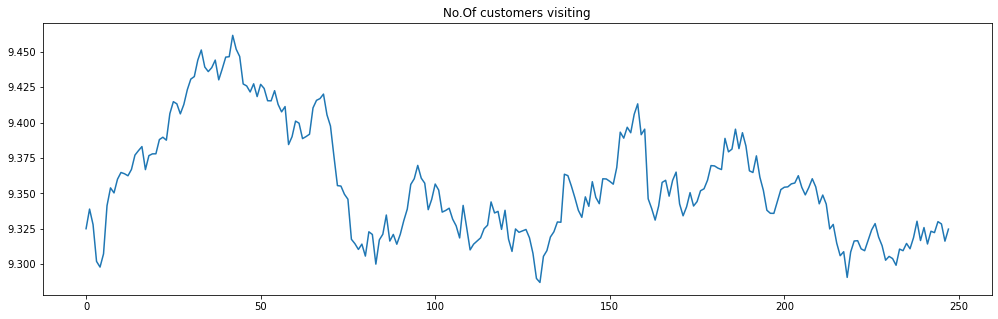

In [31]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['Close_linear'], lmbda = 0))
plt.plot(data_boxcox, label = 'After Boxcox transformation')
plt.legend
plt.title('No.Of customers visiting')
plt.show()

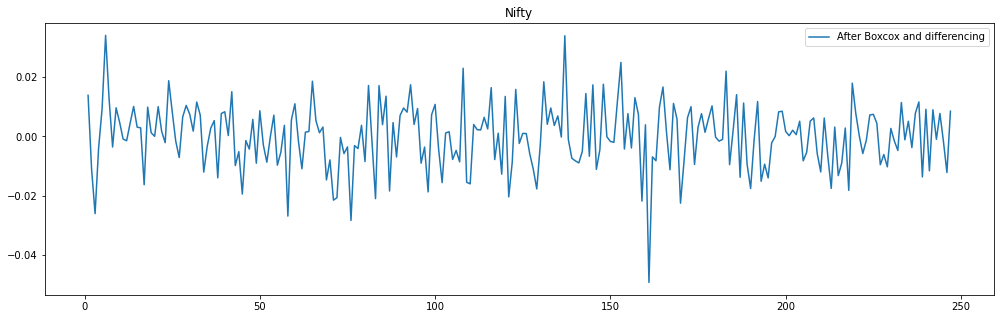

In [32]:
data_boxcox_difference = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_difference.dropna(inplace = True)
plt.plot(data_boxcox_difference, label = 'After Boxcox and differencing')
plt.legend()
plt.title('Nifty')
plt.show()

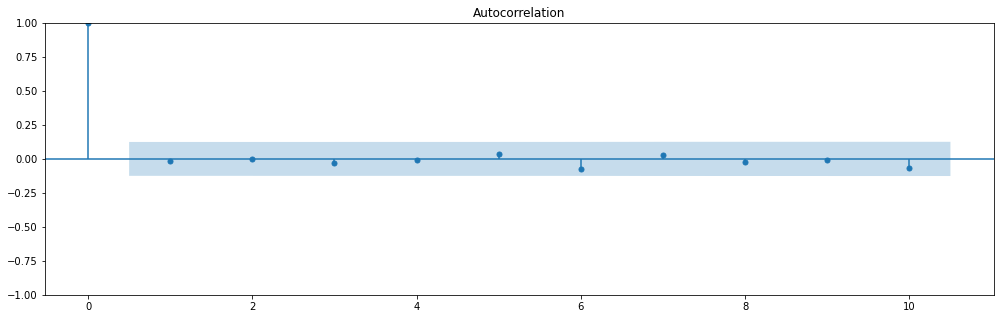

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax = plt.gca(), lags = 10)
plt.show()

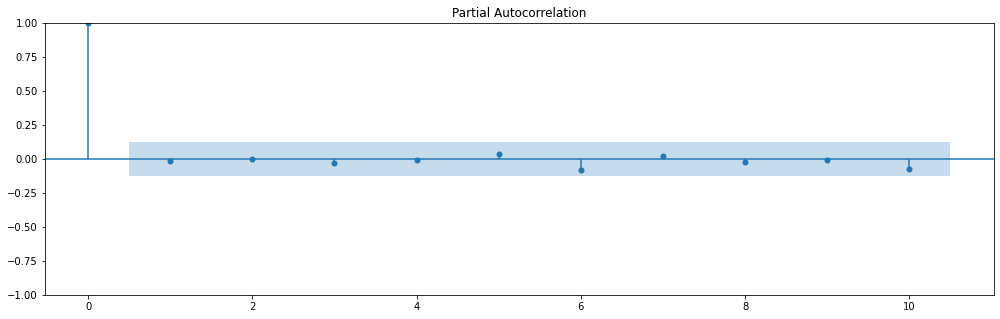

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_boxcox_difference, ax = plt.gca(), lags = 10)
plt.show()

In [35]:
length_train = 210
train_bx_d = data_boxcox_difference.head(210)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_bx_d, order = (4, 2, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.775574
ar.L2    -0.580936
ar.L3    -0.424349
ar.L4    -0.209841
ma.L1    -0.999374
sigma2    0.000154
dtype: float64


In [37]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

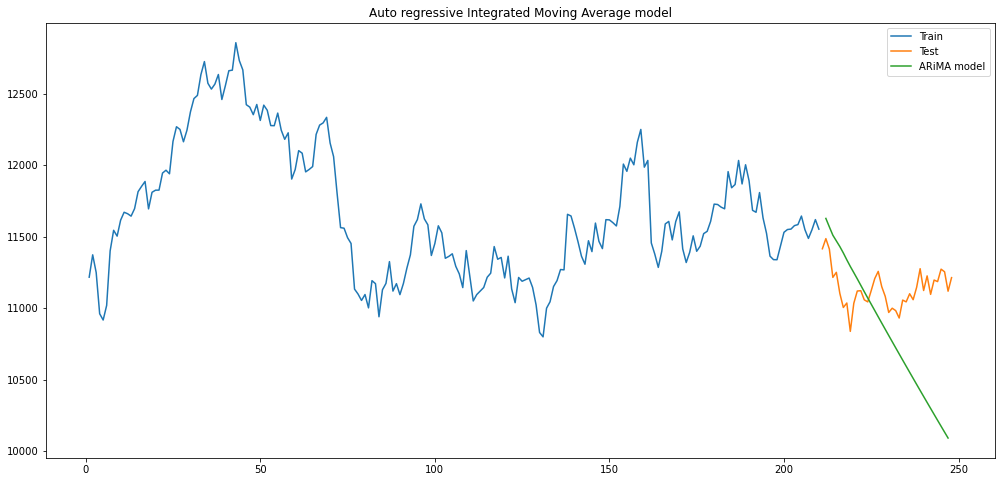

In [38]:
plt.figure(figsize=(17,8))

plt.plot(train['Close_linear'], label = 'Train')
plt.plot(test['Close_linear'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

In [40]:
mape = np.round(np.mean(np.abs(test['Close_linear']-y_arima_new['arima_forecast'])/ test['Close_linear'])*100, 2)
mape

3.89

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_bx_d, order = (4, 2, 1), seasonal_order = (1,2,2,50))
model_fit = model.fit()
print(model_fit.params)

ar.L1       -0.907468
ar.L2       -0.676701
ar.L3       -0.425955
ar.L4       -0.170209
ma.L1       -0.995041
ar.S.L50    -0.385086
ma.S.L50    -0.431957
ma.S.L100    0.052706
sigma2       0.000542
dtype: float64


In [42]:
y_sarima_new = data_boxcox_difference.copy()
y_sarima_new['sarima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox_difference'].cumsum()
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox'].add(data_boxcox[0])
y_sarima_new['sarima_forecast'] = np.exp(y_sarima_new['sarima_forecast_boxcox'])

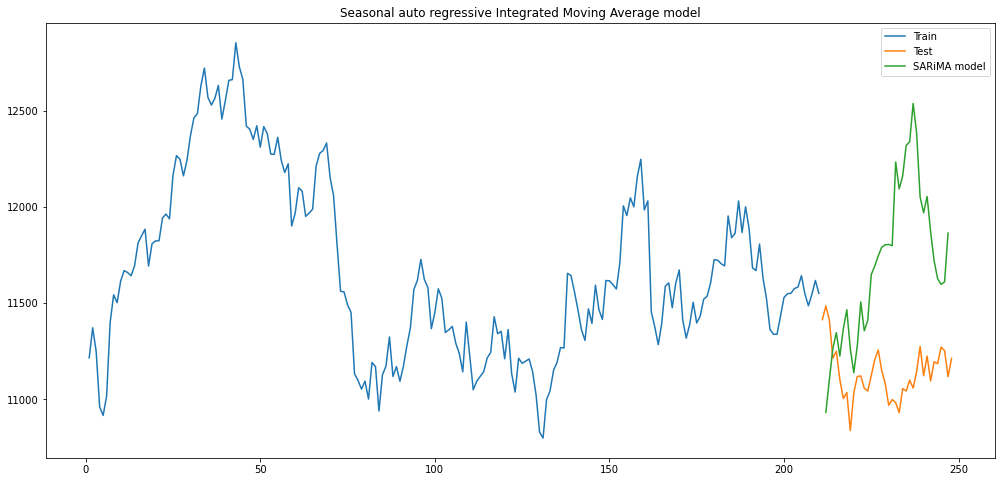

In [43]:
plt.figure(figsize=(17,8))

plt.plot(train['Close_linear'], label = 'Train')
plt.plot(test['Close_linear'], label = 'Test')
plt.plot(y_sarima_new['sarima_forecast'][test.index.min():], label = 'SARiMA model')

plt.legend()
plt.title('Seasonal auto regressive Integrated Moving Average model')
plt.show()

In [44]:
mape = np.round(np.mean(np.abs(test['Close_linear']-y_sarima_new['sarima_forecast'])/ test['Close_linear'])*100, 2)
mape

5.59

In [ ]:
#M.Vinay Krishna